In [6]:
from tiatoolbox.wsicore.wsireader import WSIReader
import numpy as np
import matplotlib.pyplot as plt
import os
from monkey.data.data_utils import (
    parse_json_annotations,
    detection_to_annotation_store,
)

# print(fetch_pretrained_weights("mapde-conic"))

Convert Ground Truth Annotations to AnnotationStore for visualization

In [5]:
annotations_folder = (
    "/home/u1910100/Downloads/Monkey/annotations/json"
)

save_dir = "/home/u1910100/Documents/Monkey/local_output"

wsi_id = "A_P000001"
inflammatory_json_name = f"{wsi_id}_inflammatory-cells.json"
lymphocyte_json_name = f"{wsi_id}_lymphocytes.json"
monocyte_json_name = f"{wsi_id}_monocytes.json"

inflammatory_json_path = os.path.join(
    annotations_folder, inflammatory_json_name
)
lymphocytes_json_path = os.path.join(
    annotations_folder, lymphocyte_json_name
)
monocyte_json_path = os.path.join(
    annotations_folder, monocyte_json_name
)

inflammatory_annotations = parse_json_annotations(
    inflammatory_json_path
)
inflammatory_points = inflammatory_annotations["points"]
lymphocyte_annotations = parse_json_annotations(lymphocytes_json_path)
lymphocyte_points = lymphocyte_annotations["points"]
monocyte_annotations = parse_json_annotations(monocyte_json_path)
monocyte_points = monocyte_annotations["points"]


records = []
for point in inflammatory_points:
    records.append(
        {
            "x": point["point"][0],
            "y": point["point"][1],
            "type": "inflammatory",
            "prob": 1.0,
        }
    )


store = detection_to_annotation_store(records, scale_factor=1.0)
store_save_path = os.path.join(save_dir, f"{wsi_id}_true.db")
store.dump(store_save_path)

Convert tif mask to png overlay

|2024-10-29|12:57:27.042| [WARNING] Metadata: Falling back to TIFF resolution tag for microns-per-pixel (MPP).
|2024-10-29|12:57:27.043| [WARNING] Metadata: Objective power inferred from microns-per-pixel (MPP).


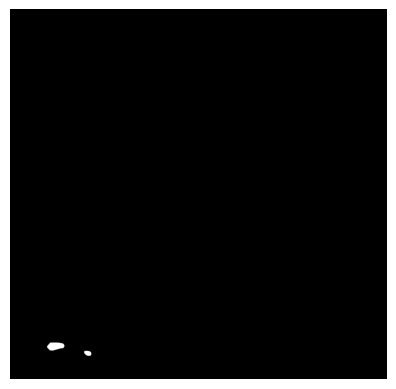

In [11]:
mask_path = "/home/u1910100/Documents/Monkey/test/input/images/tissue-mask/A_P000001_mask.tif"
mask_reader = WSIReader.open(mask_path)
mask_thumbnail = mask_reader.slide_thumbnail()
binary_mask = mask_thumbnail * 255

plt.imshow(binary_mask)
plt.axis("off")
plt.show()

from PIL import Image

image = Image.fromarray(binary_mask)
image.save(
    "/home/u1910100/Documents/Monkey/local_output/A_P000001_PAS_CPG_mask.png"
)